In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

In [2]:
import shap
shap.initjs()

# Data Ingesgtion

In [3]:
data = pd.read_csv("./data/abalone/abalone.data",
                  names=["sex", "length", "diameter", "height",
                        "whole weight", "shucked weight",
                        "viscera weight", "shell weight",
                        "rings"])
print(len(data))

4177


In [4]:
data.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Data Exploration

Text(0.5, 0, 'whole weight')

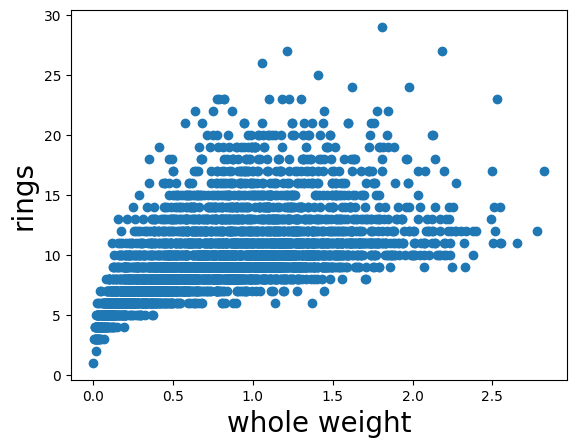

In [5]:
# # Plot 1: Plot the whole weight
plt.scatter(data['whole weight'], data['rings'])
plt.ylabel('rings', size=20)
plt.xlabel('whole weight', size=20)

Text(0.5, 0, 'sex')

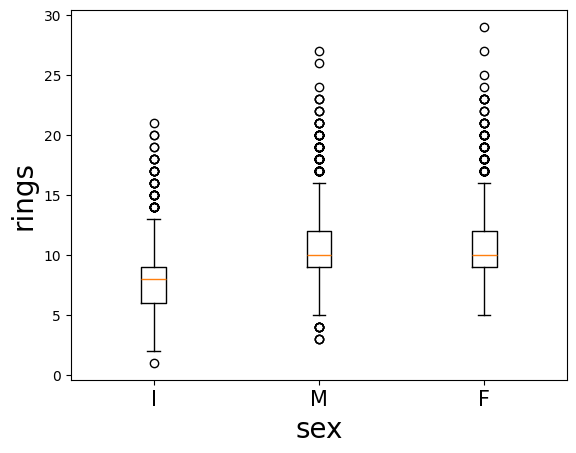

In [6]:
# Plot 2: Box plot for the sex
plt.boxplot(data[data.sex == 'I']['rings'], positions=[1])
plt.boxplot(data[data.sex == 'M']['rings'], positions=[2])
plt.boxplot(data[data.sex == 'F']['rings'], positions=[3])

plt.xticks(ticks=[1, 2, 3], labels=['I', 'M', 'F'], size=15)
plt.ylabel('rings', size=20)
plt.xlabel('sex', size=20)

<Axes: >

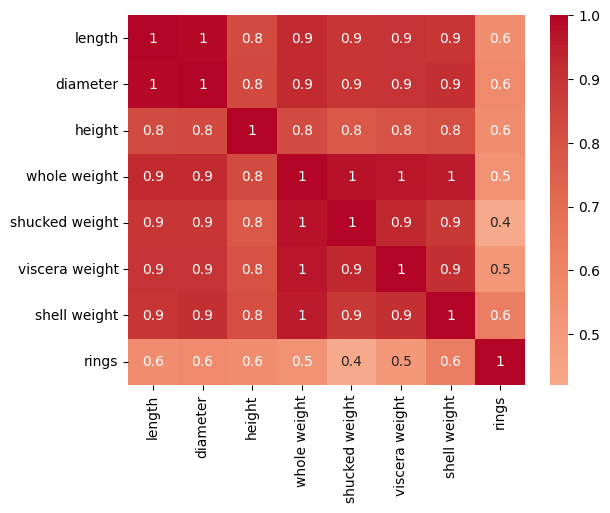

In [7]:
# Plot 3: Correlation matrix for all continuous variables using heatmap
cont = ['length', 'diameter', 'height',
       'whole weight', 'shucked weight',
       'viscera weight', 'shell weight',
       'rings']

corr_matrix = pd.DataFrame(data[cont], columns=cont).corr()

sns.heatmap(corr_matrix,
           cmap='coolwarm',
           center=0,
           annot=True,
           fmt='.1g')

# Feature Engineering

In [8]:
y = data['rings']
X = data[['sex', 'length', 'height', 'shucked weight', 'viscera weight', 'shell weight']]

In [9]:
y.shape, X.shape

((4177,), (4177, 6))

In [10]:
X.head()

,sex,length,height,shucked weight,viscera weight,shell weight
0,M,0.455,0.095,0.2245,0.1010,0.150
1,M,0.350,0.090,0.0995,0.0485,0.070
2,F,0.530,0.135,0.2565,0.1415,0.210
3,M,0.440,0.125,0.2155,0.1140,0.155
4,I,0.330,0.080,0.0895,0.0395,0.055


In [11]:
# Convert categorical variable into continuous
X['sex.M'] = [1 if s == 'M' else 0 for s in X['sex']]
X['sex.F'] = [1 if s == 'F' else 0 for s in X['sex']]
X['sex.I'] = [1 if s == 'I' else 0 for s in X['sex']]

X = X.drop('sex', axis=1)

/var/folders/q1/0wbf5r0s1pz2xqhqm6mlj8680000gn/T/ipykernel_51499/1885649609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex.M'] = [1 if s == 'M' else 0 for s in X['sex']]
/var/folders/q1/0wbf5r0s1pz2xqhqm6mlj8680000gn/T/ipykernel_51499/1885649609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex.F'] = [1 if s == 'F' else 0 for s in X['sex']]


In [12]:
X.head()

,length,height,shucked weight,viscera weight,shell weight,sex.M,sex.F,sex.I
0,0.455,0.095,0.2245,0.1010,0.150,1,0,0
1,0.350,0.090,0.0995,0.0485,0.070,1,0,0
2,0.530,0.135,0.2565,0.1415,0.210,0,1,0
3,0.440,0.125,0.2155,0.1140,0.155,1,0,0
4,0.330,0.080,0.0895,0.0395,0.055,0,0,1


# Modelling

In [13]:
# Train the model
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Text(0.5, 0, 'Actual')

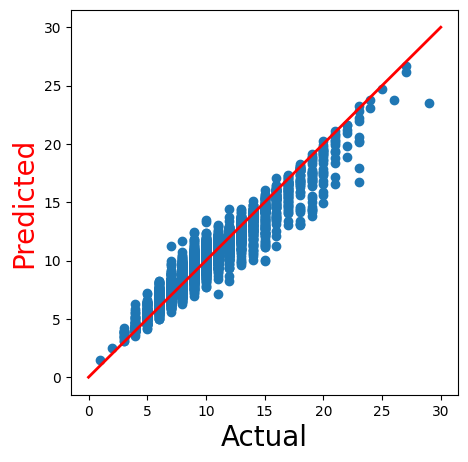

In [16]:
# Get predictions
y_pred = model.predict(X)

# Model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y, y_pred)
plt.plot([0, 30],
         [0, 30],
         color='r',
         linestyle='-',
         linewidth=2)

plt.ylabel('Predicted', size=20)
plt.xlabel('Actual', size=20)

# SHAP Analysis

In [19]:
# Create SHAP explainer object and get values
explainer = shap.Explainer(model)
shap_values = explainer(X)

In [20]:
np.shape(shap_values.values)

(4177, 8)

## Waterfall Plot

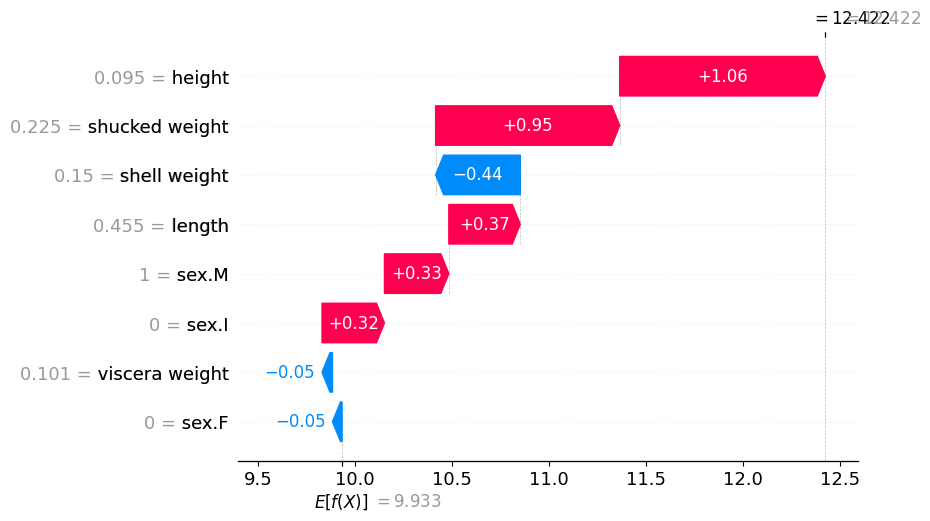

<Figure size 1000x600 with 0 Axes>

In [39]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0], show=False)
plt.figure(figsize=(10, 6))
plt.show()

## Force Plot

In [40]:
shap.plots.force(shap_values[0])

## Stacked Force Plot

In [41]:
shap.plots.force(shap_values[0:100])

## Absolute Mean Plot

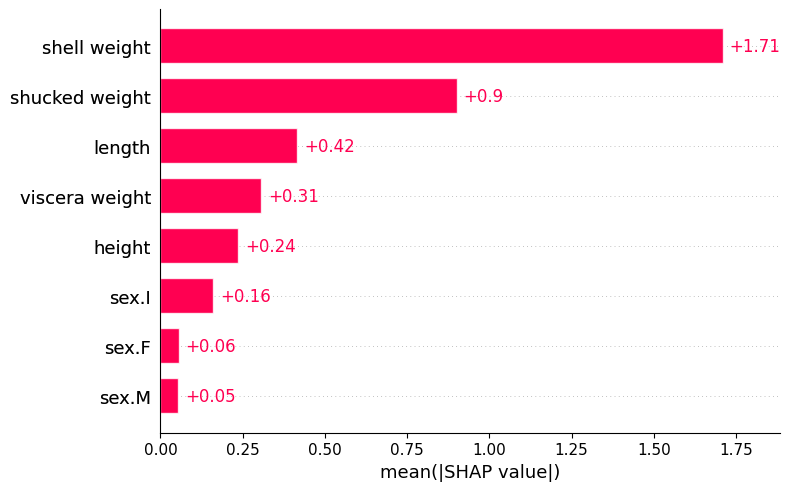

In [42]:
shap.plots.bar(shap_values)